In [1]:
#importing modules
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

#import our own functions
from calc_sum_mean_variance_std import calc_mean
from calc_sum_mean_variance_std import calc_sample_std

In [2]:
df = pd.read_csv("Discovery_Statistics.csv")

In [8]:
df.head()

Designation Discovery Date (YYYY-MM-DD)  H (mag)  MOID (au)  q (au)  \
0  (2018 PF22)                  2018-08-11     20.7      0.359    0.45   
1   (2018 NT1)                  2018-07-07     21.9      0.121    1.11   
2   (2018 ML8)                  2018-06-18     21.9      0.107    1.12   
3   (2018 LK2)                  2018-06-02     19.7      0.068    0.96   
4   (2018 KK2)                  2018-05-17     18.4      0.284    1.28   

   Q (au)  period (yr)  i (deg) PHA Orbit Class  
0    4.28         3.64    22.75   N      Apollo  
1    3.23         3.19     9.74   N        Amor  
2    3.14         3.12     8.59   N        Amor  
3    2.52         2.29    19.50   N      Apollo  
4    4.46         4.86    14.11   N        Amor

In [9]:
df.describe()

H (mag)   MOID (au)      q (au)        Q (au)   period (yr)  \
count  268.000000  296.000000  296.000000    293.000000  2.930000e+02   
mean    20.673881    0.287456    1.027230    148.838225  6.315405e+03   
std      5.096498    0.618835    0.653859   1545.674407  7.795822e+04   
min     15.500000    0.001000    0.150000      1.010000  4.400000e-01   
25%     19.400000    0.051000    0.767500      2.260000  1.920000e+00   
50%     20.300000    0.145000    0.970000      3.570000  3.380000e+00   
75%     21.300000    0.269250    1.110000      4.600000  4.560000e+00   
max     99.900000    6.373000    7.150000  23255.110000  1.254180e+06   

          i (deg)  
count  296.000000  
mean    27.583986  
std     25.255168  
min      0.820000  
25%     13.505000  
50%     21.800000  
75%     33.045000  
max    162.300000

In [10]:
"""
http://4cminews.com/?p=30879
https://en.wikipedia.org/wiki/2016_WF9

designation    = year + identifier of the object in space (ex: 2016 WF9) - wikipedia.org/wiki/2016_WF9
discovery_date = the date the NEOWISE space RADAR detected the object (discovery: first observed) yyyy-mm-dd
h_mag          = absolute magnitude of the object in log scale (ex: H (mag)= 20.1) - wikipedia.org/wiki/Absolute_magnitude
               = only objects larger than roughly 140 meters in diameter (or absolute magnitude, H > 22)
               = see : https://en.wikipedia.org/wiki/Minimum_orbit_intersection_distance
i_deg          = inclination degree of the orbit (irrelevant), the tilt of the object orbit around a body
moid_au        = minimum orbit intersection distance
               = An object is classified as a potentially hazardous object (PHO) – that is,posing a possible risk to Earth –
               = if, among other conditions, its Earth MOID is less than 0.05 AU.
               = (MOID < 0.05)
               = https://en.wikipedia.org/wiki/Minimum_orbit_intersection_distance
               = ex: earth MOID for 2016_WF9 = 0.0156 AU ~ MOID (au): 0.015 in dataset
orbit_class    = group name of the Near Earth Orbit route around the sun compared to earth (irrelevant)
period_yr      = how many earth years the object makes it's own full orbit
               = the time a given astronomical object takes to complete one orbit around another object
               = in degrees °, ex:  Inclination	14.995°  or i (deg): 15 (irrelevant)
pha            = potentially hazardous asteroids (Y/N) binary data
               = suspected extinct comet, classified as near-Earth object and potentially hazardous asteroid of Apollo group
q_au_1         = (AU) min amplitude (= earth is at 1 AU)
               = q (au): 0.98 or Perihelion  0.9816 AU
               = the point where the body comes closest to the Sun
q_au_2         = (AU) max amplitude (= earth is at 1 AU)
               = Q (au): 4.76 or Aphelion  4.7614 AU
               = which is the point in the orbit where the celestial body is farthest from the Sun
               = https://en.wikipedia.org/wiki/Perihelion_and_aphelion
"""

"\nhttp://4cminews.com/?p=30879\nhttps://en.wikipedia.org/wiki/2016_WF9\n\ndesignation    = year + identifier of the object in space (ex: 2016 WF9) - wikipedia.org/wiki/2016_WF9\ndiscovery_date = the date the NEOWISE space RADAR detected the object (discovery: first observed) yyyy-mm-dd\nh_mag          = absolute magnitude of the object in log scale (ex: H (mag)= 20.1) - wikipedia.org/wiki/Absolute_magnitude\n               = only objects larger than roughly 140 meters in diameter (or absolute magnitude, H > 22)\n               = see : https://en.wikipedia.org/wiki/Minimum_orbit_intersection_distance\ni_deg          = inclination degree of the orbit (irrelevant), the tilt of the object orbit around a body\nmoid_au        = minimum orbit intersection distance\n               = An object is classified as a potentially hazardous object (PHO) – that is,posing a possible risk to Earth –\n               = if, among other conditions, its Earth MOID is less than 0.05 AU.\n               = (MOI

In [11]:
df.drop(["Discovery Date (YYYY-MM-DD)",
         "Orbit Class",
         "period (yr)",
         "PHA", "q (au)",
         "Q (au)",
         "i (deg)"], axis=1, inplace=True)

In [12]:
df

Designation  H (mag)  MOID (au)
0           (2018 PF22)     20.7      0.359
1            (2018 NT1)     21.9      0.121
2            (2018 ML8)     21.9      0.107
3            (2018 LK2)     19.7      0.068
4            (2018 KK2)     18.4      0.284
5            (2018 JW1)     22.4      0.060
6            (2018 HT3)     18.3      0.335
7             (2018 GA)     20.4      0.108
8            (2018 EC9)     24.1      0.021
9            (2018 EQ4)     19.6      0.101
10            (2018 EB)     21.8      0.009
11           (2018 CQ1)     21.0      0.221
12           (2018 AE3)     21.4      0.075
13           (2017 YA7)     21.2      0.199
14           (2017 YN3)     19.2      0.104
15          (2017 VT14)     23.1      0.005
16           (2017 VH2)     18.7      0.437
17            (2017 VT)     21.0      0.053
18           (2017 UQ4)     24.0      0.064
19           (2017 TQ3)     20.6      0.187
20          (2017 SY32)     20.7      0.041
21          (2017 SH33)     18.4      0.280
22          (2017 RN17)     21.7      0.127
23          (2017 QP17)     19.5      0.359
24          (2017 QC36)     20.6      0.041
25          (2017 OP68)     21.1      0.051
26           (2017 MD9)     20.2      0.169
27            (2017 LU)     18.6      0.036
28          (2017 KO34)     21.2      0.104
29          (2017 KO31)     23.3      0.165
..                  ...      ...        ...
266        (2010 EX119)     19.3      0.160
267         (2010 EN44)     24.3      0.023
268  414746 (2010 EH20)     18.0      0.271
269    C/2010 E3 (WISE)      NaN      1.546
270         (2010 EX11)     24.1      0.028
271    C/2010 D4 (WISE)      NaN      6.373
272    C/2010 D3 (WISE)      NaN      3.586
273    P/2010 D2 (WISE)      NaN      2.945
274  477519 (2010 DJ56)     19.2      0.027
275         (2010 DJ77)     21.6      0.049
276         (2010 DH56)     20.3      0.333
277         (2010 DK34)     20.4      0.332
278         (2010 DH77)     21.4      0.146
279         (2010 DG77)     21.4      0.008
280  445305 (2010 DM56)     19.9      0.007
281  C/2010 DG56 (WISE)      NaN      0.650
282           356P/WISE      NaN      1.703
283         (2010 DM21)     20.2      0.259
284        (2010 CN141)     22.4      0.061
285        (2010 CP140)     19.5      0.097
286         (2010 CC55)     22.5      0.080
287         (2010 CH18)     19.0      0.333
288         (2010 CA55)     21.3      0.151
289   504800 (2010 CO1)     21.7      0.022
290    P/2010 B2 (WISE)      NaN      0.630
291  477490 (2010 CG18)     20.7      0.128
292  436329 (2010 GX62)     20.1      0.012
293        (2010 AU118)     99.9      0.147
294         (2010 AG79)     19.9      0.237
295         (2010 AB78)     18.3      0.205

[296 rows x 3 columns]

In [13]:
df = df[ (df["H (mag)"] > 22) &
         (df["MOID (au)"] < 0.05)]

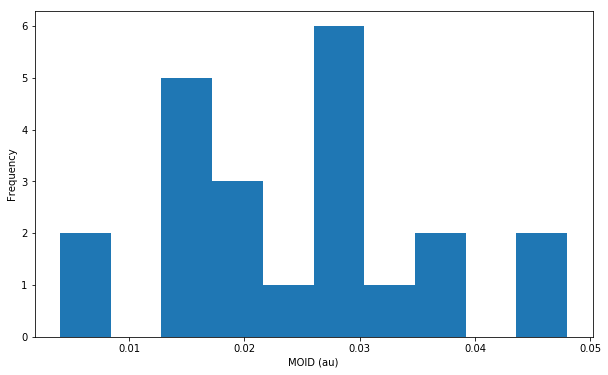

In [14]:
plt.figure(figsize=(10,6))
df["MOID (au)"].plot(kind='hist')
plt.xlabel("MOID (au)")            #corrected a mistaken label
plt.show()

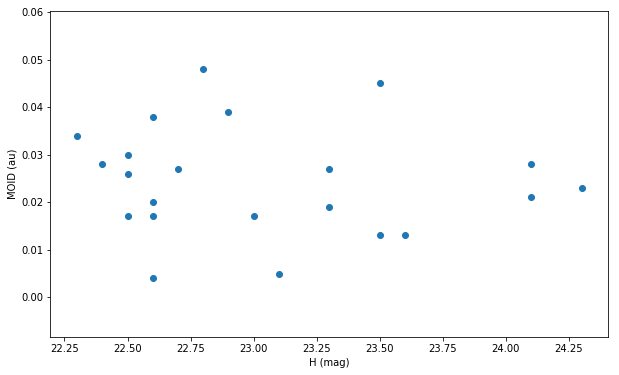

In [10]:
plt.figure(figsize=(10,6))
plt.scatter(x = df["H (mag)"],
            y = df["MOID (au)"])
plt.xlabel("H (mag)")
plt.ylabel("MOID (au)")
plt.show()

In [11]:
#the median of the column H(mag)
calc_mean(df["H (mag)"].values)

23.036363636363642

In [12]:
#the median of the column H(mag)
calc_sample_std(df["H (mag)"].values)

0.5842986896080516

In [13]:
from scipy.stats import ttest_1samp

In [14]:
"""
nul hypothesis means no collisions : H0 : x = 0 
alt hypothesis means collisions : H1 : x > 0
statistical significant value : alpha = 0.05 (5% ~ 1/len(df))
"""
tstat, pval = ttest_1samp(df["H (mag)"], 0)
pval

5.266203873829835e-35

In [19]:
print(df)

      Designation  H (mag)  MOID (au)
8      (2018 EC9)     24.1      0.021
15    (2017 VT14)     23.1      0.005
32   (2017 FL127)     22.9      0.039
48     (2016 VK6)     22.8      0.048
65    (2016 FO12)     22.6      0.004
78   (2015 VZ145)     23.5      0.013
81   (2015 TK237)     22.6      0.038
83    (2015 SS20)     22.4      0.028
113   (2014 VP35)     23.3      0.027
121   (2014 RH12)     23.5      0.045
138   (2014 JL25)     23.0      0.017
153   (2011 BY24)     22.6      0.017
202  (2010 LV108)     22.6      0.020
207   (2010 LK68)     22.5      0.026
209   (2010 LJ68)     22.7      0.027
243  (2010 HZ104)     22.5      0.030
244  (2010 HX107)     23.6      0.013
250   (2010 GP67)     22.5      0.017
260   (2010 FA81)     22.3      0.034
265   (2010 FG81)     23.3      0.019
267   (2010 EN44)     24.3      0.023
270   (2010 EX11)     24.1      0.028
